In [1]:
%matplotlib inline

In [2]:
from data_loader import load_umachine_z0
mock = load_umachine_z0()
cenmask = mock['upid'] == -1
print(mock.keys())

['id', 'upid', 'sfr', 'hostid', 'logmhost', 'logsm', 'log_ssfr', 'logmpeak']


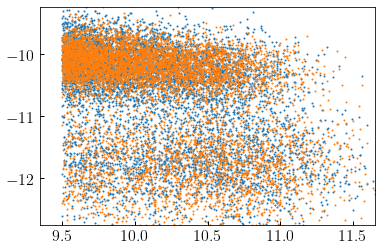

In [3]:
from hod_um_approx import main_sequence_median_logssfr

qmask = mock['log_ssfr'] < -11
nq = np.count_nonzero(qmask)
nsf = len(mock) - nq

ms_loc = main_sequence_median_logssfr(mock['logsm'][~qmask])
new_log_ssfr_ms = np.random.normal(loc=ms_loc, scale=0.25)
new_log_ssfr_q = np.random.normal(loc=-11.8, scale=0.5, size=nq)
mock['log_ssfr_hod'] = 0.
mock['log_ssfr_hod'][qmask] = new_log_ssfr_q
mock['log_ssfr_hod'][~qmask] = new_log_ssfr_ms

fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(9.35, 11.65)
ylim = ax.set_ylim(-12.75, -9.25)

n=40
__=ax.scatter(mock['logsm'][cenmask][::n], mock['log_ssfr'][cenmask][::n], s=1)
__=ax.scatter(mock['logsm'][cenmask][::n], mock['log_ssfr_hod'][cenmask][::n], s=1)


In [4]:
def compute_quenched_fraction(log_ssfr, logmhost, lgmhost_table, dlogm):
    
    collector = []
    for lgm in lgmhost_table:
        logmhost_mask = np.abs(logmhost-lgm) < dlogm
        collector.append(np.mean(log_ssfr[logmhost_mask] < -11))
    return np.array(collector)

dlogm = 0.15
lgmarr = np.arange(11.75, 14.85+dlogm, dlogm)

logsm_mask1 = np.abs(mock['logsm'] - 9.75) < 0.15
logsm_mask2 = np.abs(mock['logsm'] - 10.15) < 0.15
logsm_mask3 = np.abs(mock['logsm'] - 10.5) < 0.15
logsm_mask4 = np.abs(mock['logsm'] - 10.95) < 0.15
cenmask = mock['hostid'] == mock['id']
_msk1 = ~cenmask & logsm_mask1
_msk2 = ~cenmask & logsm_mask2
_msk3 = ~cenmask & logsm_mask3
_msk4 = ~cenmask & logsm_mask4

fqarr1 = compute_quenched_fraction(
    mock['log_ssfr'][_msk1], mock['logmhost'][_msk1], lgmarr, 0.15)
fqarr2 = compute_quenched_fraction(
    mock['log_ssfr'][_msk2], mock['logmhost'][_msk2], lgmarr, 0.15)
fqarr3 = compute_quenched_fraction(
    mock['log_ssfr'][_msk3], mock['logmhost'][_msk3], lgmarr, 0.15)
fqarr4 = compute_quenched_fraction(
    mock['log_ssfr'][_msk4], mock['logmhost'][_msk4], lgmarr, 0.15)
fqcensarr = compute_quenched_fraction(
    mock['log_ssfr'][cenmask], mock['logmpeak'][cenmask], lgmarr, 0.15)


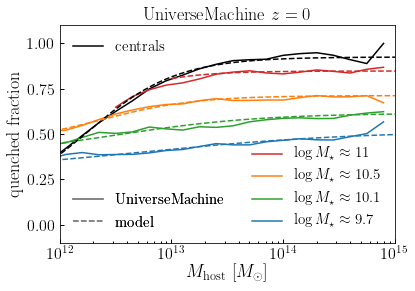

In [5]:
from hod_um_approx import quenched_fraction_centrals, quenched_fraction_satellites
from hod_um_approx import _get_satmodel_params
from hod_um_approx import _satmodel_x0, _satmodel_k, _satmodel_ymin, _satmodel_ymax

fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(1e12, 1e15)
ylim = ax.set_ylim(-0.1, 1.1)
xscale = ax.set_xscale('log')
__=ax.plot(10**lgmarr, fqcensarr, label=r'${\rm centrals}$', color='k')
__=ax.plot(10**lgmarr[5:], fqarr4[5:], label=r'$\log M_{\star}\approx11$', color=mred)
__=ax.plot(10**lgmarr, fqarr3, label=r'$\log M_{\star}\approx10.5$', color=morange)
__=ax.plot(10**lgmarr, fqarr2, label=r'$\log M_{\star}\approx10.1$', color=mgreen)
__=ax.plot(10**lgmarr, fqarr1, label=r'$\log M_{\star}\approx9.7$', color=mblue)
xlabel = ax.set_xlabel(r'$M_{\rm host}\ [M_{\odot}]$')
ylabel = ax.set_ylabel(r'${\rm quenched\ fraction}$')
title = ax.set_title(r'${\rm UniverseMachine}\ z=0$')
leg = ax.legend()

x = np.linspace(10, 16, 1000)

#  Sigmoids hand-tuned by eye
# __=ax.plot(10**x, _sigmoid(x, 12.3, 2.75, 0.5, 0.85), '--', color=mred)
# __=ax.plot(10**x, _sigmoid(x, 12.35, 2.5, 0.45, 0.7), '--', color=morange)
# __=ax.plot(10**x, _sigmoid(x, 12.5, 1.5, 0.375, 0.615), '--', color=mgreen)
# __=ax.plot(10**x, _sigmoid(x, 12.75, 1., 0.275, 0.525), '--', color=mpurple)
# __=ax.plot(10**x, _sigmoid(x, 12.25, 2.5, 0.1, 0.925), '--', color='k')

#  Composite model
__=ax.plot(10**x, quenched_fraction_centrals(x), '--', color='k')
__=ax.plot(10**x[500:], quenched_fraction_satellites(11, x)[500:], '--', color=mred)
__=ax.plot(10**x, quenched_fraction_satellites(10.45, x), '--', color=morange)
__=ax.plot(10**x, quenched_fraction_satellites(10.1, x), '--', color=mgreen)
__=ax.plot(10**x, quenched_fraction_satellites(9.7, x), '--', color=mblue)

from matplotlib import lines as mlines
solid_red = mlines.Line2D([], [], ls='-', c=mred, label=r'$\log M_{\star}\approx11$')
solid_orange = mlines.Line2D([], [], ls='-', c=morange, label=r'$\log M_{\star}\approx10.5$')
solid_green = mlines.Line2D([], [], ls='-', c=mgreen, label=r'$\log M_{\star}\approx10.1$')
solid_purple = mlines.Line2D([], [], ls='-', c=mblue, label=r'$\log M_{\star}\approx9.7$')
h1 = [solid_red, solid_orange, solid_green, solid_purple]
first_legend = plt.legend(handles=h1, loc='lower right')
__ = plt.gca().add_artist(first_legend)

solid_black = mlines.Line2D([], [], ls='-', c='k', label=r'${\rm centrals}$')
h2 = [solid_black]
second_legend = plt.legend(handles=h2, loc='upper left')
__ = plt.gca().add_artist(second_legend)

solid_gray = mlines.Line2D([], [], ls='-', c='gray', label=r'${\rm UniverseMachine}$')
dashed_gray = mlines.Line2D([], [], ls='--', c='gray', label=r'${\rm model}$')
h3 = [solid_gray, dashed_gray]
third_legend = plt.legend(handles=h3, loc='lower left')
__ = plt.gca().add_artist(third_legend)


fig.savefig('FIGS/umachine_mhost_quenching.png',
            bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200)

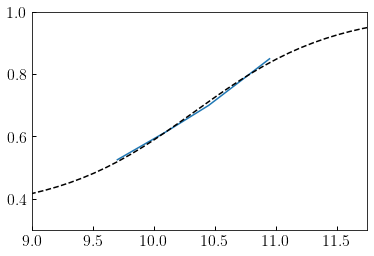

In [6]:
#  Using hand-tuned sigmoids from previous cell,
#  Build model for how the sigmoid params change with logM*
#  Once built, will port results into default values of _get_satmodel_params functions

def _sigmoid(x, x0, k, ymin, ymax):
    height_diff = ymax-ymin
    return ymin + height_diff/(1 + np.exp(-k*(x-x0)))

logsm_table = [10.95, 10.45, 10.1, 9.7]

x0_table = [12.3, 12.35, 12.5, 12.75]
k_table = [2.75, 2.5, 1.5, 1]
ymin_table = [0.5, 0.45, 0.375, 0.275]
ymax_table = [0.85, 0.7, 0.615, 0.525]

x = np.linspace(0, 100, 1000)

fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(9, 11.75)

# tune x0
# ylim = ax.set_ylim(12, 13)
# __=ax.plot(logsm_table, x0_table)
# model_x0 = _sigmoid(x, 9.95, 4, 12.9, 12.3)
# __=ax.plot(x, model_x0, '--', color='k')

# tune k
# ylim = ax.set_ylim(0, 3.5)
# __=ax.plot(logsm_table, k_table)
# model_k = _sigmoid(x, 10.25, 5, 0.9, 2.9)
# __=ax.plot(x, model_k, '--', color='k')

# tune ymin
# ylim = ax.set_ylim(0.1, 0.6)
# __=ax.plot(logsm_table, ymin_table)
# model_ymin = _sigmoid(x, 9.95, 2.5,  0.15, 0.53)
# __=ax.plot(x, model_ymin, '--', color='k')

# tune ymax
ylim = ax.set_ylim(0.3, 1)
__=ax.plot(logsm_table, ymax_table)
model_ymax = _sigmoid(x, 10.335, 1.75, 0.36, 1)
__=ax.plot(x, model_ymax, '--', color='k')


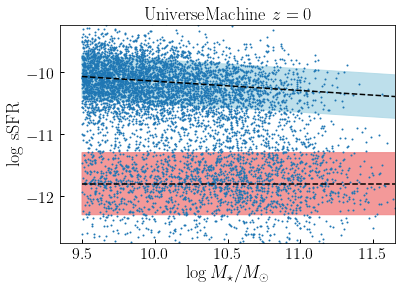

In [7]:
# Tune the main sequence SFR vs. M*

fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(9.35, 11.65)
ylim = ax.set_ylim(-12.75, -9.25)

from hod_um_approx import main_sequence_median_logssfr
x = np.linspace(9.5, 100, 1000)

ymed_ms, ms_width = main_sequence_median_logssfr(x), 0.35
__=ax.plot(x, ymed_ms, '--', color='k')
ylo, yhi = ymed_ms-ms_width, ymed_ms+ms_width
__=ax.fill_between(x, ylo, yhi, alpha=0.8, color='lightblue')

ymed_q, q_width = np.zeros_like(x) - 11.8, 0.5
__=ax.plot(x, ymed_q, '--', color='k')
ylo, yhi = ymed_q-q_width, ymed_q+q_width
__=ax.fill_between(x, ylo, yhi, alpha=0.8, color='lightcoral')


n=40
__=ax.scatter(mock['logsm'][cenmask][::n], mock['log_ssfr'][cenmask][::n], s=1)


xlabel = ax.set_xlabel(r'$\log M_{\star}/M_{\odot}$')
ylabel = ax.set_ylabel(r'${\rm log\ sSFR}$')
title = ax.set_title(r'${\rm UniverseMachine}\ z=0$')

fig.savefig('FIGS/umachine_main_sequence.png',
            bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200)